## TUGAS BESAR MCL

Anggota :


1.   Putri Eka Lestari - 1305210067
2.   Cetrin Azahra - 1305210072
3.   Amalia Najwannisa - 1305213003
4.   Najma Zahira Layalia M. - 1305213054

Tahapan yang dilakukan


1.   Reduksi Feature dengan Dimension Reduction pada kolom yang digunakan
2.   inisiasi Random Centroid
3.   Get Cluster Label
4.   Inisiasi Centroid Baru
5.   Looping cluster
6.   Evaluasi setiap K menggunakan Elbow Method










## Data Info

In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import plotly.express as px

In [ ]:
# read dataset
df = pd.read_csv("https://raw.githubusercontent.com/chxraz/k-means-clustering/main/dataset_factbook.csv")

df.head()

,Country,Continent,Area,Birth rate,Current account balance,Death rate,Electricity consumption,Electricity production,Exports,GDP,...,Life expectancy at birth,Military expenditures,Natural gas consumption,Oil consumption,Population,Public debt,Railways,Reserves of foreign exchange & gold,Total fertility rate,Unemployment rate
0,Albania,Europe,"28,748",15.08,"($504,000,000.00)",5.12,"6,760,000,000","5,680,000,000.00","$552,400,000.00","$17,460,000,000.00",...,77.24,1.49,"30,000,000.00","7,500","3,563,112",NaN,447.0,"1,206,000,000.00",2.04,14.8
1,Algeria,Africa,"2,381,740",17.13,"$11,900,000,000.00",4.60,"23,610,000,000","25,760,000,000.00","$32,160,000,000.00","$212,300,000,000.00",...,73.00,3.20,"22,320,000,000.00","209,000","32,531,853",37.4,3973.0,"43,550,000,000.00",1.92,25.4
2,Angola,Africa,"1,246,700",44.64,"($37,880,000.00)",25.90,"1,587,000,000","1,707,000,000.00","$12,760,000,000.00","$23,170,000,000.00",...,36.61,10.60,"530,000,000.00","31,000","11,190,786",NaN,2761.0,"800,000,000.00",6.27,NaN
3,Argentina,America,"2,766,890",16.90,"$5,473,000,000.00",7.56,"81,650,000,000","81,390,000,000.00","$33,780,000,000.00","$483,500,000,000.00",...,75.91,1.30,"31,100,000,000.00","486,000","39,537,943",118.0,34091.0,"19,470,000,000.00",2.19,14.8
4,Armenia,Asia,"29,800",11.76,"($240,400,000.00)",8.16,"5,797,000,000","6,492,000,000.00","$850,000,000.00","$13,650,000,000.00",...,71.55,6.50,"1,400,000,000.00","5,700","2,982,904",NaN,845.0,"555,000,000.00",1.32,30.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              149 non-null    object 
 1   Continent                            149 non-null    object 
 2   Area                                 149 non-null    object 
 3   Birth rate                           149 non-null    float64
 4   Current account balance              149 non-null    object 
 5   Death rate                           149 non-null    float64
 6   Electricity consumption              149 non-null    object 
 7   Electricity production               149 non-null    object 
 8   Exports                              149 non-null    object 
 9   GDP                                  149 non-null    object 
 10  GDP per capita                       149 non-null    object 
 11  GDP real growth rate            

In [ ]:
# Mengambil kolom yang akan digunakan
filter = ['Exports', 'Imports', 'Industrial production growth rate', 'Investment', 'Unemployment rate']

df_baru = df[filter].copy()

df_baru.head()

,Exports,Imports,Industrial production growth rate,Investment,Unemployment rate
0,"$552,400,000.00","$2,076,000,000.00",3.1,18.4,14.8
1,"$32,160,000,000.00","$15,250,000,000.00",6.0,26.2,25.4
2,"$12,760,000,000.00","$4,896,000,000.00",1.0,34.5,NaN
3,"$33,780,000,000.00","$22,060,000,000.00",12.0,18.3,14.8
4,"$850,000,000.00","$1,300,000,000.00",15.0,19.8,30.0


In [ ]:
# Cek jumlah missing values
df_baru.isnull().sum()

Exports                               0
Imports                               0
Industrial production growth rate    15
Investment                            5
Unemployment rate                    22
dtype: int64

In [ ]:
# Sebaran statistik data
df_baru.describe()

,Industrial production growth rate,Investment,Unemployment rate
count,134.000000,144.000000,127.000000
mean,6.246269,21.747222,14.470079
std,5.483600,8.120895,12.776176
min,-7.800000,8.000000,0.600000
25%,3.000000,17.175000,6.100000
50%,5.000000,19.850000,10.400000
75%,8.375000,24.550000,18.000000
max,30.000000,65.100000,70.000000


## Pre-processing

In [ ]:
# Memisahkan kolom 'Exports' dan 'Imports' berdasarkan tanda '$' dan menghapus string kosong

df_baru['Exports'] = df_baru['Exports'].str.split('$').apply(lambda x: [value.replace(',', '') for value in x if value])
df_baru['Imports'] = df_baru['Imports'].str.split('$').apply(lambda x: [value.replace(',', '') for value in x if value])

# Meratakan daftar nilai yang dihasilkan

df_baru['Exports'] = df_baru['Exports'].explode()
df_baru['Imports'] = df_baru['Imports'].explode()

# Mengonversi setiap nilai menjadi float

df_baru['Exports'] = df_baru['Exports'].astype(float)
df_baru['Imports'] = df_baru['Imports'].astype(float)

In [ ]:
df_baru.head()

,Exports,Imports,Industrial production growth rate,Investment,Unemployment rate
0,5.524000e+08,2.076000e+09,3.1,18.4,14.8
1,3.216000e+10,1.525000e+10,6.0,26.2,25.4
2,1.276000e+10,4.896000e+09,1.0,34.5,NaN
3,3.378000e+10,2.206000e+10,12.0,18.3,14.8
4,8.500000e+08,1.300000e+09,15.0,19.8,30.0


In [ ]:
# Melihat persebaran data pada setiap kolom yang digunakan dengan menggunakan boxplot
fig = px.box(df_baru)
fig.show()

In [ ]:
# Scalling data menggunakan Min-Max Normalization dengan rentang 1-20
df_baru = (df_baru - df_baru.min()) / (df_baru.max() - df_baru.min())*19+ 1

In [ ]:
# menampilkan boxplot setelah normalisasi
fig = px.box(df_baru)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [ ]:
# Drop outlier menggunakan IQR Method
iqr = df_baru.quantile(0.75) - df_baru.quantile(0.25)
inner_fence_a = df_baru.quantile(0.25) - 1.5*iqr
inner_fence_b = df_baru.quantile(0.75) + 1.5*iqr
outer_fence_a = df_baru.quantile(0.25) - 3*iqr
outer_fence_b = df_baru.quantile(0.75) + 3*iqr

In [ ]:
# Deklarasi variable baru untuk drop outliers
df_final = df_baru[filter].copy()
df_final.head()

,Exports,Imports,Industrial production growth rate,Investment,Unemployment rate
0,1.011607,1.026197,6.478836,4.460595,4.887608
1,1.683888,1.195785,7.936508,7.056042,7.789625
2,1.271258,1.062498,5.423280,9.817863,NaN
3,1.718345,1.283450,10.952381,4.427320,4.887608
4,1.017937,1.016207,12.460317,4.926445,9.048991


In [ ]:
# Mengganti outliers menjadi null
df_final = df_final[(df_final > inner_fence_a) & (df_final < inner_fence_b)
                    & (df_final > outer_fence_a) & (df_final < outer_fence_b)]

In [ ]:
# Cek missing values
df_final.isnull().sum()

Exports                              24
Imports                              21
Industrial production growth rate    25
Investment                           13
Unemployment rate                    32
dtype: int64

In [ ]:
# Mengisi data kosong dengan menggunakan rata-rata setiap data
df_final.fillna(df_final.mean(numeric_only=True), inplace=True)

In [ ]:
df_final.isnull().sum()

Exports                              0
Imports                              0
Industrial production growth rate    0
Investment                           0
Unemployment rate                    0
dtype: int64

In [ ]:
# Menampilkan boxplot setelah IQR Method
fig = px.box(df_final)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

## Model K-Means

Rumus untuk menghitung jarak centroid dan data

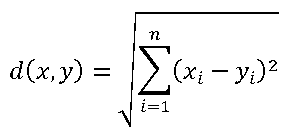

In [ ]:
# inisiasi random centroids pertama kali
def inisiasi_centroid(data,k):
  centroid = []
  for i in range(k):
    centroids = data.apply(lambda x: float(x.sample()))
    centroid.append(centroids)
  return pd.concat(centroid, axis=1)

# menghitung jarak centroid dan data
def euclidean_dist(data,centroid):
  return np.sqrt(((data - centroid)**2).sum(axis=1))

# fungsi untuk melabeli setiap data dengan cara menghitung jarak data ke setiap centroid
def set_cluster(data, centroid):
  jarak = centroid.apply(lambda x: euclidean_dist(data, x))
  return jarak.idxmin(axis=1), jarak

# deklarasi centroid baru
def centroid_baru(data, labels, k):
  centroid = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
  return centroid

# show scatter
def tampilkan_scatter(data, labels, centroid, iterasi):
  pca = PCA(n_components=5)
  x = pca.fit_transform(data)
  y = pca.transform(centroid.T)
  fig = px.scatter(x=x[:, 0], y=x[:, 1], color=labels, labels={'color': 'Cluster'})
  fig.add_scatter(x=y[:, 0], y=y[:, 1], mode='markers', marker=dict(color='green'), name='Centroid')
  fig.update_layout(showlegend=True)
  fig.show()

In [ ]:
# Main Program
max_iter = 130 # Deklarasi iterasi maksimal untuk mencari centroids
k = 7 # Deklarasi cluster maksimal
sse = [] # Deklarasi sum square error untuk penghitungan elbow method

# Kolom yang digunakan
filter_baru = ['Exports', 'Imports', 'Industrial production growth rate', 'Investment', 'Unemployment rate']
df_paling_baru = df_final[filter_baru].copy()

for i in range(k) : # Looping setiap k-cluster
  centro = inisiasi_centroid(df_paling_baru, i+1) # Menginisiasi centroids
  new_centro = pd.DataFrame() # Deklarasi variable untuk menyimpan centroids baru
  iter = 0
  curr_sse = 0
  # Looping iterasi dan kondisi centorids baru tidak sama dengan centroids lama
  while iter < max_iter and not centro.equals(new_centro) :
    new_centro = centro

    cluster_label, temp = set_cluster(df_paling_baru, centro) # function getlabel
    centro = centroid_baru(df_paling_baru, cluster_label, i+1) # function newcentro
    if(centro.equals(new_centro)) : # Kondisi apabila centorids baru sama dengan centroids lama
      print("Centroids Konvergen setelah iterasi:", iter+1)
      print("K-cluster                          :", i+1)
      scat_plot = tampilkan_scatter(df_paling_baru, cluster_label, centro, iter) #function scatter
      # Perhitungan sse
      for i in range(len(df_paling_baru)):
        curr_center = centro[cluster_label[i]]
        curr_sse += (df_paling_baru.T[i] - curr_center) ** 2
      sse.append(curr_sse)
    iter += 1 # Increament iterasi

Centroids Konvergen setelah iterasi: 2
K-cluster                          : 1


Centroids Konvergen setelah iterasi: 6
K-cluster                          : 2


Centroids Konvergen setelah iterasi: 7
K-cluster                          : 3


Centroids Konvergen setelah iterasi: 8
K-cluster                          : 4


Centroids Konvergen setelah iterasi: 8
K-cluster                          : 5


Centroids Konvergen setelah iterasi: 13
K-cluster                          : 6


Centroids Konvergen setelah iterasi: 7
K-cluster                          : 7


## Evaluasi setiap K menggunakan Elbow Method
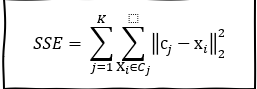

In [ ]:
# Perhitungan Inertia untuk membentuk Elbow Method
inertia = []
for i in range(k) :
  jumlah = 0
  for j in sse[i] :
    jumlah += j
  inertia.append(jumlah)

In [ ]:
inertia

[1568.6233630591464,
 1153.530084524315,
 865.9621729175914,
 679.7604277635405,
 615.8065794708837,
 523.7778932637493,
 464.22135779510916]

Text(0, 0.5, 'Inertia Values')

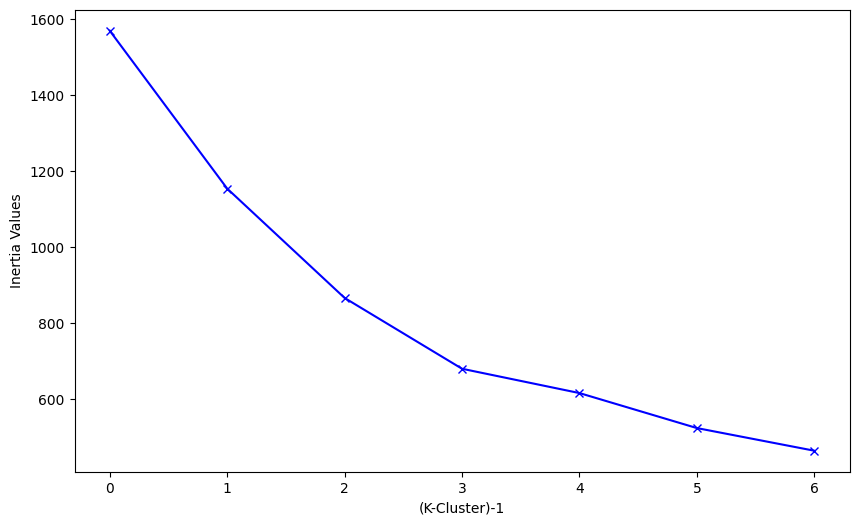

In [ ]:
# chart untuk elbow method
fig = plt.figure(figsize=(10, 6))
plt.plot(inertia, 'bx-')
plt.xlabel("(K-Cluster)-1")
plt.ylabel("Inertia Values")